# Módulos Utilizados:

In [1]:
import requests
import csv

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,8)
sns.set()

# Objetivo:

In [ ]:
# Análise exploratória dos microdados de vacinação no estado do Acre, disponibilizados no OpenDataSUS. 
# Última atualização do Notebook: 17/05

# Tópicos:
* Vacinas Aplicadas - Total por Data
* Vacinas Aplicadas - Desagregado por 1ª e 2ª Doses
* Vacinas Aplicadas - Desagregado por Fabricante
* Vacinas Aplicadas - Desagregado por Grupo de Atendimento
* Vacinas Aplicadas - Desagregado por Categoria de Atendimento
* Vacinas Aplicadas - Desagregado por Município
 * Taxa de Vacinação Relativa à População do Município:
* Vacinas Aplicadas - Desagregado por Faixa Etária
* Vacinas Aplicadas - Desagregado por Sexo do Paciente
* Vacinas Aplicadas - Desagregado por Etnia

## Extraindo os Dados:

In [ ]:
# https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao

In [ ]:
url = 'https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-05-17/uf%3DAC/part-00000-38efe271-9c84-4325-a6ca-68b79ca36460.c000.csv'

In [4]:
!wget https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-05-17/uf%3DAC/part-00000-38efe271-9c84-4325-a6ca-68b79ca36460.c000.csv

--2021-05-18 00:31:52--  https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-05-17/uf%3DAC/part-00000-38efe271-9c84-4325-a6ca-68b79ca36460.c000.csv
Resolving s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)... 52.95.164.51
Connecting to s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)|52.95.164.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87619294 (84M) [text/csv]
Saving to: ‘part-00000-38efe271-9c84-4325-a6ca-68b79ca36460.c000.csv’

part-00000-38efe271 100%[===================>]  83.56M  15.3MB/s    in 6.9s    

2021-05-18 00:31:59 (12.0 MB/s) - ‘part-00000-38efe271-9c84-4325-a6ca-68b79ca36460.c000.csv’ saved [87619294/87619294]



In [ ]:
#req = requests.get(url,allow_redirects = True)
#with open('dados_acre.csv', 'wb') as csv_file:
#  csv_file.write(req.content)

In [ ]:
# Preview do CSV

#with open('/content/dados_acre.csv','r') as csv_file:
#  reader = csv.reader(csv_file)
#  line_count = 0
#  for row in reader:
#    if line_count == 0:
#      print(f'Headers: f{", ".join(row)}')
#      line_count += 1
#    else:
#      print(f'Dados: f{", ".join(row)}')
#      line_count += 1
#    if line_count >= 20:
#      break
#  print(f'Processed {line_count} lines.')

In [5]:
df = pd.read_csv('/content/vac_microdados_acre.csv',delimiter=';')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155553 entries, 0 to 155552
Data columns (total 34 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   document_id                               155553 non-null  object 
 1   paciente_id                               155553 non-null  object 
 2   paciente_idade                            155553 non-null  int64  
 3   paciente_datanascimento                   155553 non-null  object 
 4   paciente_enumsexobiologico                155553 non-null  object 
 5   paciente_racacor_codigo                   155553 non-null  int64  
 6   paciente_racacor_valor                    155553 non-null  object 
 7   paciente_endereco_coibgemunicipio         154357 non-null  float64
 8   paciente_endereco_copais                  154359 non-null  float64
 9   paciente_endereco_nmmunicipio             154359 non-null  object 
 10  paciente_endereco_nm

In [8]:
df['vacina_dataaplicacao'] = pd.to_datetime(df['vacina_dataaplicacao']).dt.date
df['vacina_descricao_dose'] = df['vacina_descricao_dose'].apply(lambda x: x.replace('\xa0','')) #remove os tags non-breaking space

## Exploração e Visualização:

### Vacinas Aplicadas - Total por Data

In [10]:
evolucao_total = df.groupby('vacina_dataaplicacao')['paciente_id'].agg('count')
evolucao_total.index.name = ''
evolucao_total.name = ''

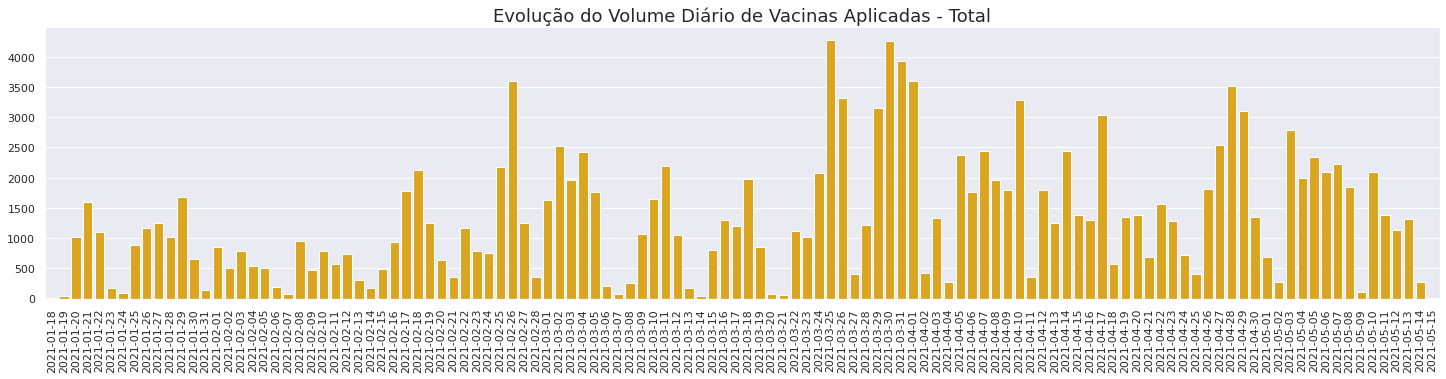

In [11]:
plt.figure(figsize=(25,5))
# df.groupby('vacina_dataaplicacao')['paciente_id'].agg('count').plot.bar(width=0.8, color='goldenrod')

evolucao_total.plot.bar(width=0.8, color='goldenrod')
plt.title('Evolução do Volume Diário de Vacinas Aplicadas - Total',fontsize=18)
plt.grid(axis= 'x')

plt.show()

### Vacinas Aplicadas - Desagregado por 1ª e 2ª Doses

In [12]:
df['vacina_descricao_dose'].value_counts()

1ªDose    110495
2ªDose     45033
Dose          25
Name: vacina_descricao_dose, dtype: int64

In [13]:
primeira_dose = df[df.vacina_descricao_dose == '1ªDose'].groupby(df.vacina_dataaplicacao)['paciente_id'].agg('count').cumsum()
segunda_dose = df[df.vacina_descricao_dose == '2ªDose'].groupby(df.vacina_dataaplicacao)['paciente_id'].agg('count').cumsum()

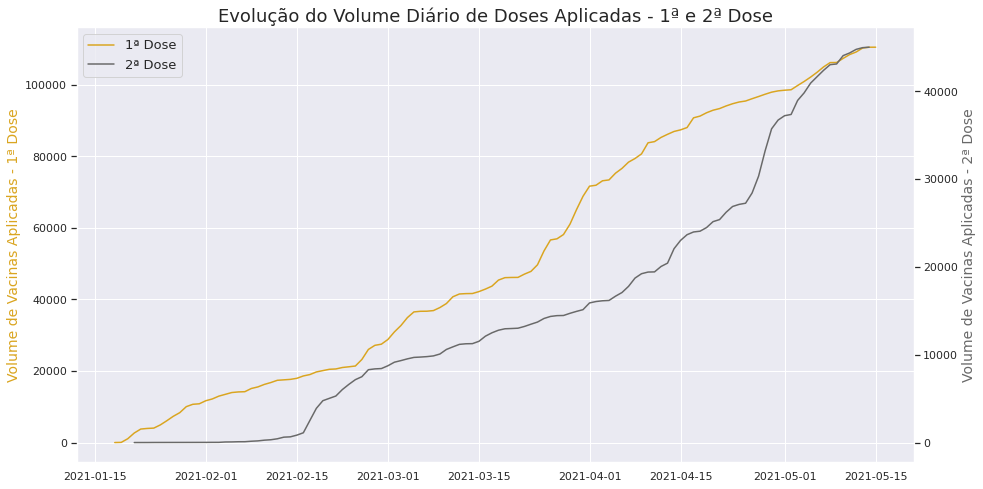

In [14]:
fig,ax1 = plt.subplots()

ax1.plot(primeira_dose,label='1ª Dose',color='goldenrod')
ax1.set_title('Evolução do Volume Diário de Doses Aplicadas - 1ª e 2ª Dose',fontsize=18)
ax1.set_ylabel('Volume de Vacinas Aplicadas - 1ª Dose',fontsize=14, color='goldenrod')

ax2 = ax1.twinx()
ax2.plot(segunda_dose,label='2ª Dose',color='dimgrey')
ax2.set_ylabel('Volume de Vacinas Aplicadas - 2ª Dose',fontsize=14, color='dimgrey' )
ax2.grid(b=None)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left',fontsize=13)

plt.show()

In [15]:
doses = pd.concat([primeira_dose,segunda_dose],axis=1)
doses.columns = ['1ª Dose','2ª Dose']

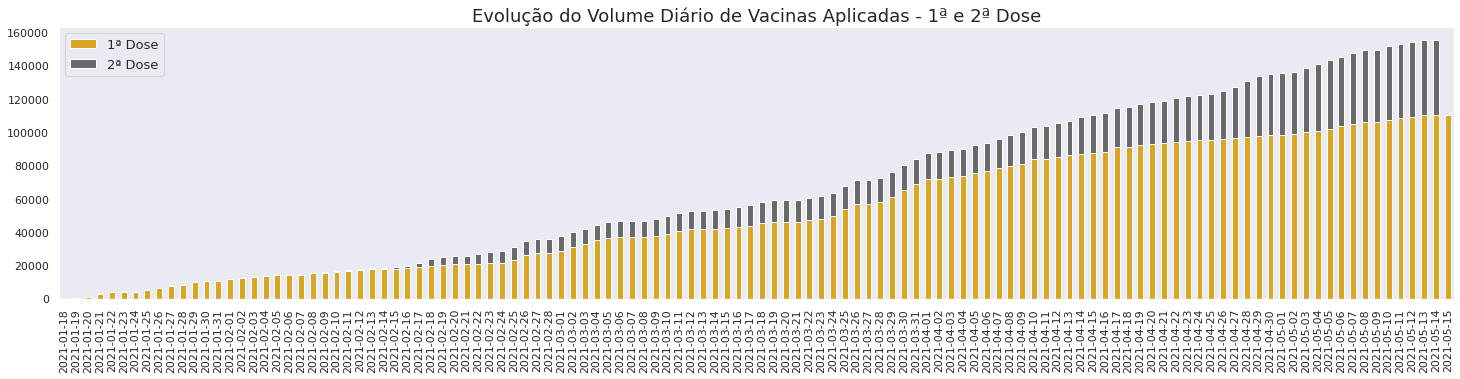

In [16]:
doses.plot.bar(stacked=True, color = ['goldenrod','dimgrey'],figsize = (25,5))
plt.title('Evolução do Volume Diário de Vacinas Aplicadas - 1ª e 2ª Dose', fontsize = 18)
plt.legend(fontsize = 13)
plt.grid(b=None)

plt.show()

### Vacinas Aplicadas - Desagregado por Fabricante

In [17]:
df['vacina_fabricante_nome'].unique()

array(['FUNDACAO BUTANTAN', 'FUNDACAO OSWALDO CRUZ',
       'SERUM INSTITUTE OF INDIA LTD', 'MINISTERIO DA SAUDE',
       'SINOVAC LIFE SCIENCE CO LTD', 'Janssen-Cilag'], dtype=object)

In [18]:
vacinas_nomes = list(df['vacina_nome'].unique())

In [19]:
vac_butantan = df[df['vacina_nome'] == vacinas_nomes[0]].groupby(df.vacina_dataaplicacao)['paciente_id'].agg('count').cumsum()
vac_oxford = df[df['vacina_nome'] == vacinas_nomes[1]].groupby(df.vacina_dataaplicacao)['paciente_id'].agg('count').cumsum()

In [20]:
vacs_tipo = pd.concat([vac_butantan,vac_oxford],axis=1)
vacs_tipo.columns = ['Butantan','Oxford']

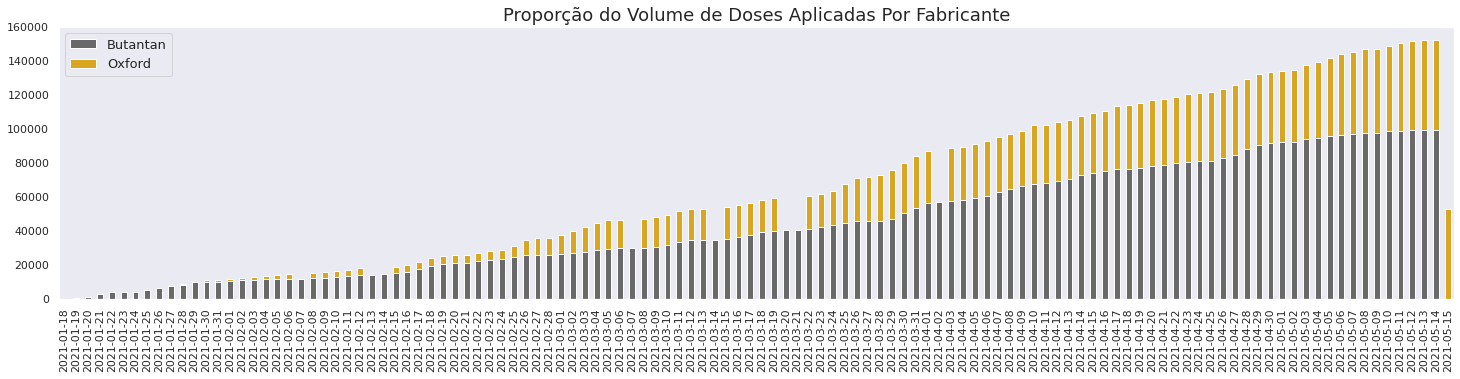

In [21]:
vacs_tipo.plot.bar(stacked=True,color=['dimgrey','goldenrod'],figsize = (25,5))
plt.title('Proporção do Volume de Doses Aplicadas Por Fabricante', fontsize = 18)
plt.legend(fontsize=13)
plt.grid(b=None)

plt.show()

### Vacinas Aplicadas - Desagregado por Grupo de Atendimento

In [24]:
print(df['vacina_grupoatendimento_nome'].unique())
print('')
print(f'Número de Grupos: {len(df["vacina_grupoatendimento_nome"].unique())}')
print('')
print('Códigos')
print(df['vacina_grupoatendimento_codigo'].unique())
print('')
print(f'Número de Códigos: {len(df["vacina_grupoatendimento_codigo"].unique())}')
print('')
print(f"Mediana de Vacinações por Grupos: {df.groupby('vacina_grupoatendimento_nome')['paciente_id'].agg('count').median()}")
print(f"Média de Vacinações por Grupos: {df.groupby('vacina_grupoatendimento_nome')['paciente_id'].agg('count').mean()}")

['Pessoas de 65 a 69 anos' 'Pessoas de 60 nos ou mais Institucionalizadas'
 'Médico' 'Pessoas de 60 a 64 anos' 'Outros'
 'Povos indígenas em terras indígenas' 'Técnico de Enfermagem'
 'Pessoas de 75 a 79 anos' 'Pessoas de 80 anos ou mais'
 'Pessoal da Limpeza' 'Pessoas de 70 a 74 anos' 'Ribeirinha'
 'Enfermeiro(a)' 'Odontologista' 'Fisioterapeutas'
 'Pessoas com Deficiências Permanente Grave' 'Policial Militar'
 'Cozinheiro e Auxiliares' 'Recepcionista' 'Policial Federal'
 'Policial Civil' 'Nutricionista' 'Farmacêutico' 'Segurança' 'Estudante'
 'Fonoaudiólogo'
 'Hipertensão de difícil controle ou com complicações/lesão de órgão alvo'
 nan 'Técnico de Odontologia' 'Bombeiro Militar' 'Motorista de Ambulância'
 'Biomédico' 'Diabetes Mellitus' 'Psicólogo'
 'Doenças Cardiovasculares e Cerebrovasculares'
 'Doença Pulmonar Obstrutiva Crônica'
 'Funcionário do Sistema de Privação de Liberdade' 'Síndrome de Down'
 'Câncer' 'Doença Renal' 'Assistente Social' 'Trabalhadores Portuários'
 'Auxiliar

In [25]:
grupos_atendimento = {nome:codigo for nome,codigo in zip(df['vacina_grupoatendimento_nome'].unique(),df['vacina_grupoatendimento_codigo'].unique())}

In [27]:
# Separando os grupos de atendimento com casos de vacinação superior à média total
for grupo in df["vacina_grupoatendimento_nome"].unique():
  try:
    if (df.groupby('vacina_grupoatendimento_nome')['paciente_id'].agg('count')[grupo] >= df.groupby('vacina_grupoatendimento_nome')['paciente_id'].agg('count').mean()) == True:
      print(grupo)
    else:
      continue
  except:
    continue

Pessoas de 65 a 69 anos
Pessoas de 60 nos ou mais Institucionalizadas
Pessoas de 60 a 64 anos
Outros
Povos indígenas em terras indígenas
Técnico de Enfermagem
Pessoas de 75 a 79 anos
Pessoas de 80 anos ou mais
Pessoal da Limpeza
Pessoas de 70 a 74 anos
Ribeirinha
Enfermeiro(a)
Hipertensão de difícil controle ou com complicações/lesão de órgão alvo


In [30]:
# lista com grupos com nº de doses aplicada superior à média
vac_grupos = [grupo for grupo in df["vacina_grupoatendimento_nome"].dropna().unique() if (df.groupby('vacina_grupoatendimento_nome')['paciente_id'].agg('count')[grupo] >= df.groupby('vacina_grupoatendimento_nome')['paciente_id'].agg('count').mean()) == True]

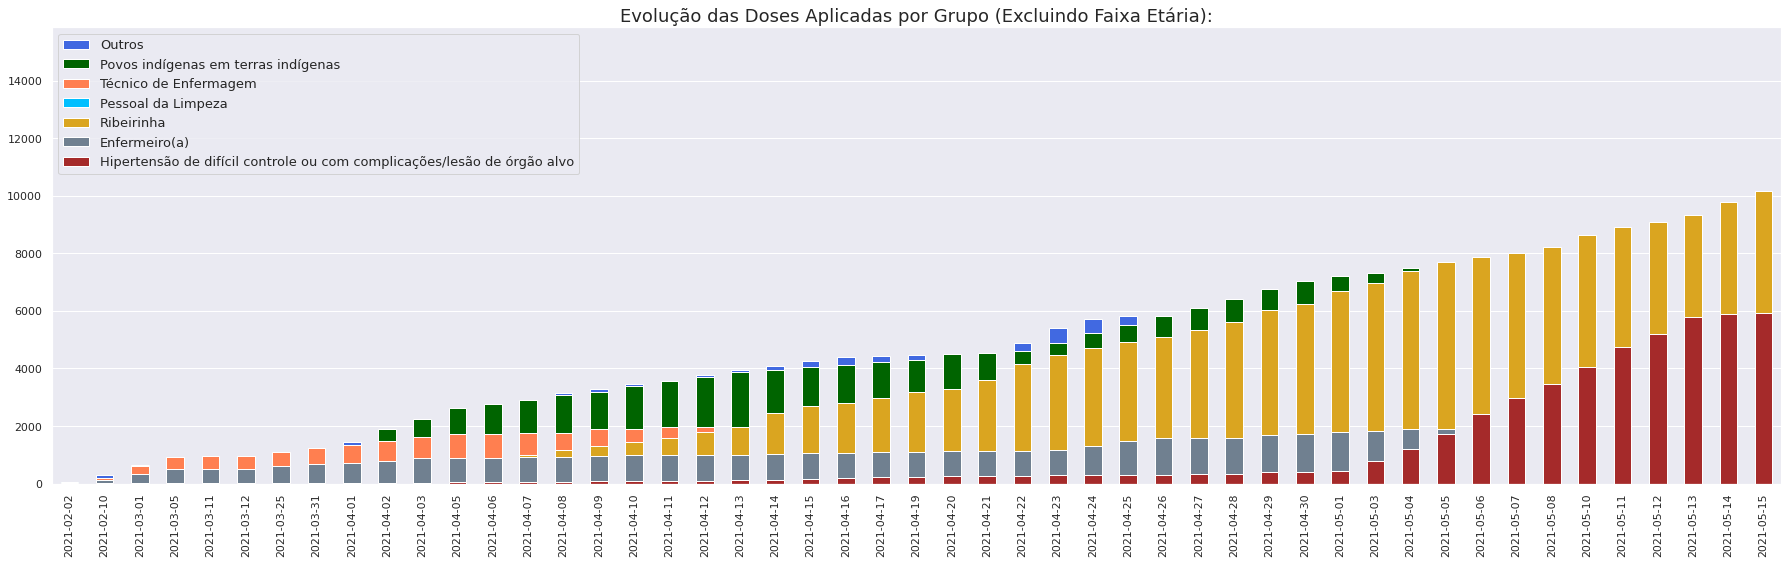

In [34]:
f = plt.figure(figsize=(25,8))
colors = ['dodgerblue','darkred','darkorange','royalblue','darkgreen','coral',
          'darkorchid','saddlebrown','deepskyblue','crimson','goldenrod','slategrey','brown']
grupo_idade = pd.DataFrame()
for index,grupo in enumerate(vac_grupos):
  #f.add_subplot(6,2,index+1)
  if grupo in (['Pessoas de 70 a 74 anos','Pessoas de 80 anos ou mais',
                'Pessoas de 60 nos ou mais Institucionalizadas','Pessoas de 65 a 69 anos',
                'Pessoas de 75 a 79 anos','Pessoas de 60 a 64 anos']):
    continue
  else:  
    grupo_item = df[df['vacina_grupoatendimento_nome'] == grupo].groupby(df.vacina_dataaplicacao)['paciente_id'].agg('count').cumsum()
    grupo_item.index.name = ''
    grupo_item.name = ''
    grupo_item.plot.bar(color=colors[index],stacked=True,label=grupo)
plt.title('Evolução das Doses Aplicadas por Grupo (Excluindo Faixa Etária):',fontsize=18)
plt.legend(loc='upper left',fontsize=13)
plt.grid(axis = 'x')

plt.tight_layout()
plt.show()

In [35]:
grupos_vac = df.groupby('vacina_grupoatendimento_nome')['paciente_id'].agg('count')[vac_grupos]
grupos_vac.index.name = ''
grupos_vac.name = ''

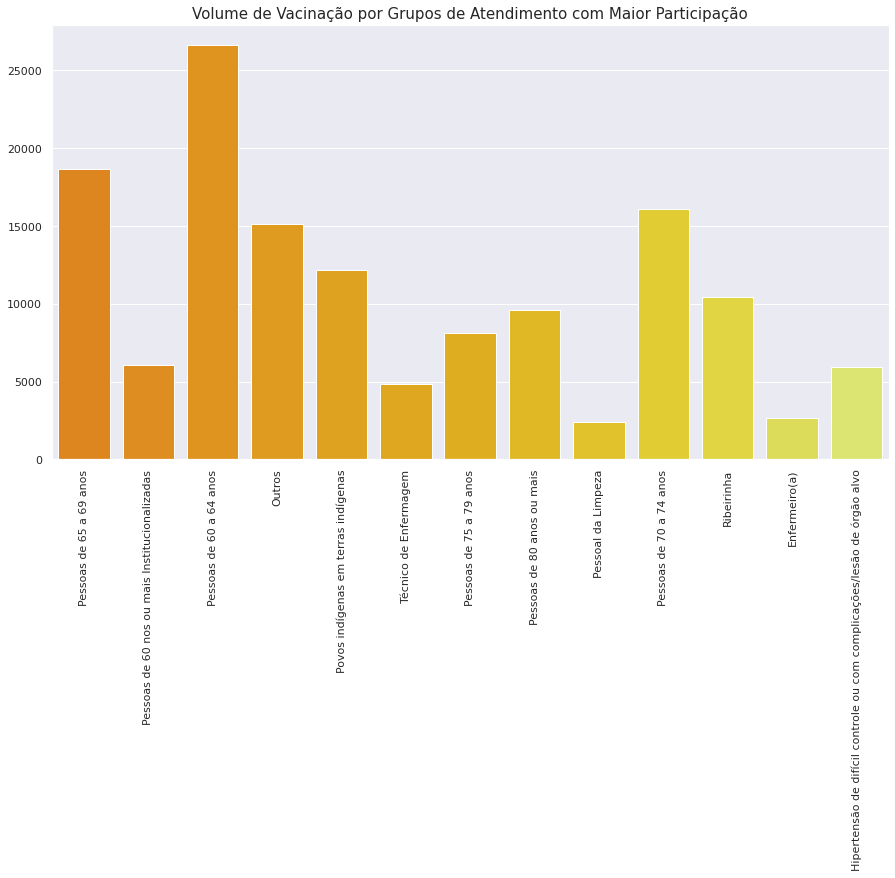

In [36]:
sns.barplot(x = grupos_vac.index, y = grupos_vac,palette='Wistia_r')
plt.title('Volume de Vacinação por Grupos de Atendimento com Maior Participação',fontsize = 15)
plt.xticks(rotation=90)

plt.show()

### Vacinas Aplicadas - Desagregado por Categoria de Atendimento

In [37]:
print(df['vacina_categoria_nome'].unique())
print(f'\nNúmero de Categorias: {len(df["vacina_categoria_nome"].unique())}')
print('')
print('Códigos:')
print(df['vacina_categoria_codigo'].unique())
print(f'\nNúmero de Códigos: {len(df["vacina_categoria_codigo"].unique())}')

['Faixa Etária' 'Pessoas de 60 anos ou mais institucionalizadas'
 'Trabalhadores de Saúde' 'Povos Indígenas'
 'Povos e Comunidades Tradicionais' 'Pessoas com Deficiência'
 'Forças de Segurança e Salvamento' 'Comorbidades' nan
 'Funcionário do Sistema de Privação de Liberdade'
 'Trabalhadores Portuários' 'Trabalhadores da Educação'
 'Forças Armadas (membros ativos)' 'Trabalhadores Industriais']

Número de Categorias: 14

Códigos:
[ 2.  3.  9.  7.  6. 11.  5.  1. nan 14. 13. 21. 25.  8.  4. 16.]

Número de Códigos: 16


In [ ]:
categorias = {nome:codigo for nome,codigo in zip(df['vacina_categoria_nome'].unique(),df['vacina_categoria_codigo'].unique())}
categorias.pop(np.nan)
categorias.pop('Trabalhadores Industriais')

In [39]:
print(df.groupby('vacina_categoria_nome')['paciente_id'].agg('count'))
print('')
print(f"Mediana de Vacinações por Categoria: {df.groupby('vacina_categoria_nome')['paciente_id'].agg('count').median()}")
print(f"Média de Vacinações por Categoria: {df.groupby('vacina_categoria_nome')['paciente_id'].agg('count').mean()}")

vacina_categoria_nome
Comorbidades                                        8991
Faixa Etária                                       79130
Forças Armadas (membros ativos)                        4
Forças de Segurança e Salvamento                    1837
Funcionário do Sistema de Privação de Liberdade      513
Pessoas com Deficiência                              363
Pessoas de 60 anos ou mais institucionalizadas      6058
Povos Indígenas                                    12179
Povos e Comunidades Tradicionais                   10443
Trabalhadores Industriais                              1
Trabalhadores Portuários                               7
Trabalhadores da Educação                             11
Trabalhadores de Saúde                             34725
Name: paciente_id, dtype: int64

Mediana de Vacinações por Categoria: 1837.0
Média de Vacinações por Categoria: 11866.307692307691


In [40]:
# lista com categorias com nº de doses aplicada superior à mediana
cats_vac = [grupo for grupo in df["vacina_categoria_nome"].dropna().unique() if (df.groupby('vacina_categoria_nome')['paciente_id'].agg('count')[grupo] >= df.groupby('vacina_categoria_nome')['paciente_id'].agg('count').median()) == True]

In [41]:
categs_vac = df.groupby('vacina_categoria_nome')['paciente_id'].agg('count')[cats_vac]
categs_vac.index.name = ''

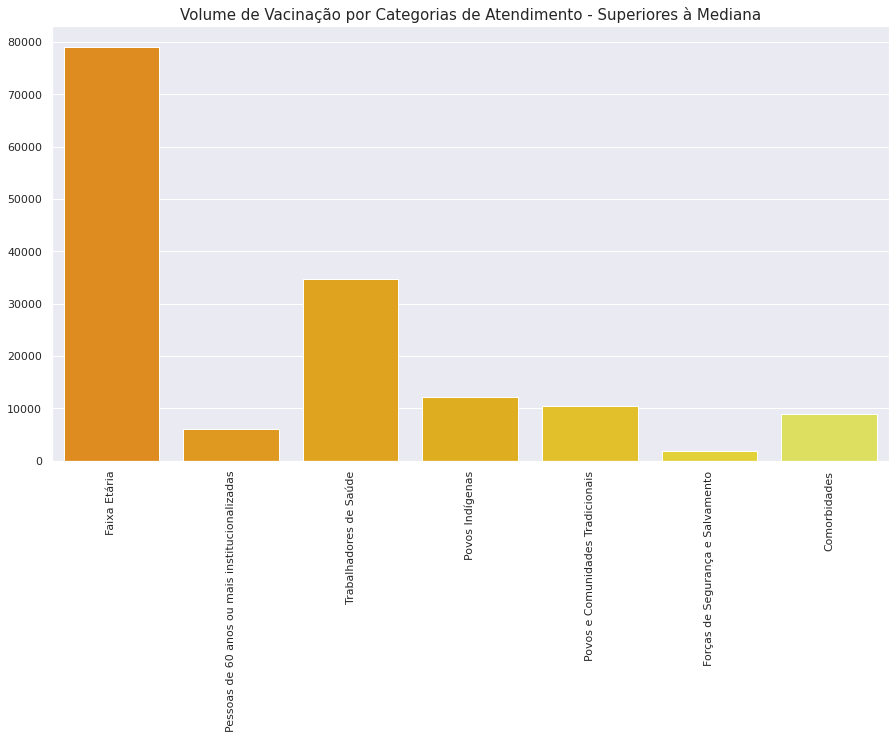

In [43]:
sns.barplot(x=categs_vac.index,y=categs_vac,palette='Wistia_r')
plt.title('Volume de Vacinação por Categorias de Atendimento - Superiores à Mediana',fontsize = 15)
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

### Vacinas Aplicadas - Desagregado por Município

In [45]:
print('Municípios de Aplicação:')
print(df['estabelecimento_municipio_nome'].unique())
print('')
print('Total:')
len(df['estabelecimento_municipio_nome'].unique())

Municípios de Aplicação:
['SENA MADUREIRA' 'RIO BRANCO' 'CRUZEIRO DO SUL' 'RODRIGUES ALVES'
 'ASSIS BRASIL' 'PLACIDO DE CASTRO' 'XAPURI' 'MANCIO LIMA' 'ACRELANDIA'
 'MARECHAL THAUMATURGO' 'SANTA ROSA DO PURUS' 'JORDAO' 'BRASILEIA'
 'BUJARI' 'PORTO WALTER' 'EPITACIOLANDIA' 'SENADOR GUIOMARD' 'PORTO ACRE'
 'TARAUACA' 'CAPIXABA' 'FEIJO' 'MANOEL URBANO']

Total:


22

In [46]:
municipios = list(df['estabelecimento_municipio_nome'].unique())

In [47]:
vac_municipios = pd.DataFrame()
for municipio in municipios:
  vac_municipios[municipio] = df[df['estabelecimento_municipio_nome'] == municipio].groupby(df.vacina_dataaplicacao)['paciente_id'].agg('count').cumsum()

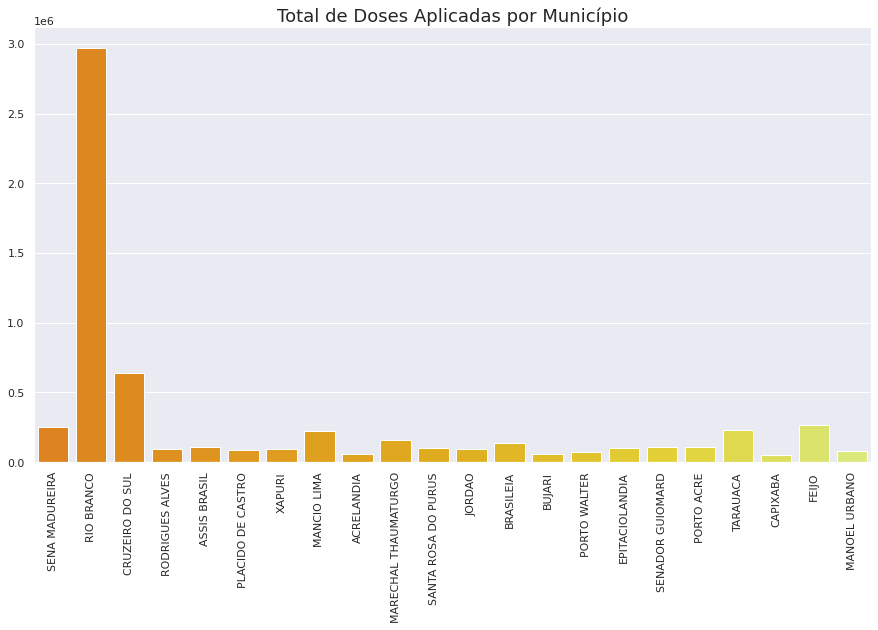

In [48]:
sns.barplot(x=vac_municipios.columns,y=vac_municipios.sum(),palette='Wistia_r')
plt.title('Total de Doses Aplicadas por Município',fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

#### Taxa de Vacinação Relativa à População do Município:

Dados sobre demografia dos municípios obtidos em:
* https://www.ibge.gov.br/cidades-e-estados/ac/.html

In [52]:
df_demo = pd.read_excel('/content/dados_pop.xlsx',skiprows=2)
df_demo = df_demo[:22]

In [54]:
for i,mun in enumerate(df_demo['Município [-]']):
  if mun.upper() in municipios:
    print(f"{i} - População {mun}: {df_demo[df_demo['Município [-]'] == mun]['População estimada - pessoas [2020]'].item()}")

1 - População Assis Brasil: 7534.0
3 - População Bujari: 10420.0
4 - População Capixaba: 12008.0
5 - População Cruzeiro do Sul: 89072.0
10 - População Manoel Urbano: 9581.0
11 - População Marechal Thaumaturgo: 19299.0
13 - População Porto Walter: 12241.0
14 - População Rio Branco: 413418.0
15 - População Rodrigues Alves: 19351.0
16 - População Santa Rosa do Purus: 6717.0
17 - População Senador Guiomard: 23236.0
18 - População Sena Madureira: 46511.0
20 - População Xapuri: 19596.0
21 - População Porto Acre: 18824.0


In [55]:
pops = {}
for i,mun in enumerate(df_demo['Município [-]']):
  if mun.upper() in municipios:
    pops[mun] = df_demo[df_demo['Município [-]'] == mun]['População estimada - pessoas [2020]'].item()

In [56]:
vac_prop = {}
for mun,pop in pops.items():
  vac_prop[mun] = round(dict(vac_municipios.sum())[mun.upper()]/pops[mun],4)
  print(f'Taxa Relativa {mun}: {round(dict(vac_municipios.sum())[mun.upper()]/pops[mun],4)}')

Taxa Relativa Assis Brasil: 14.7238
Taxa Relativa Bujari: 5.3463
Taxa Relativa Capixaba: 4.1006
Taxa Relativa Cruzeiro do Sul: 7.2109
Taxa Relativa Manoel Urbano: 8.3553
Taxa Relativa Marechal Thaumaturgo: 8.351
Taxa Relativa Porto Walter: 5.6865
Taxa Relativa Rio Branco: 7.186
Taxa Relativa Rodrigues Alves: 4.7399
Taxa Relativa Santa Rosa do Purus: 14.8149
Taxa Relativa Senador Guiomard: 4.5448
Taxa Relativa Sena Madureira: 5.4787
Taxa Relativa Xapuri: 4.8184
Taxa Relativa Porto Acre: 5.5564


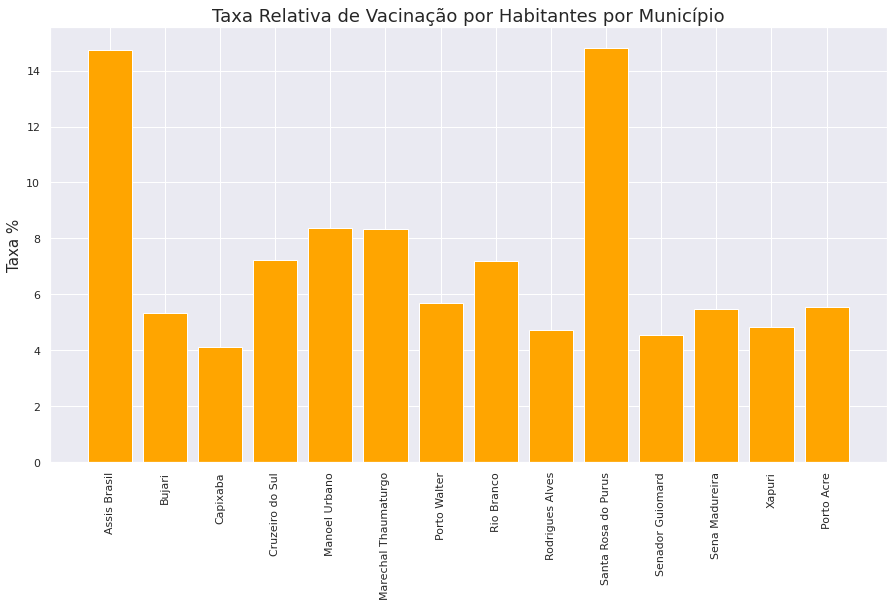

In [57]:
plt.bar(x = vac_prop.keys(), height = list(vac_prop.values()),color='orange')
plt.xticks(rotation=90)
plt.ylabel('Taxa %',fontsize=15)
plt.title('Taxa Relativa de Vacinação por Habitantes por Município',fontsize=18)

plt.show()

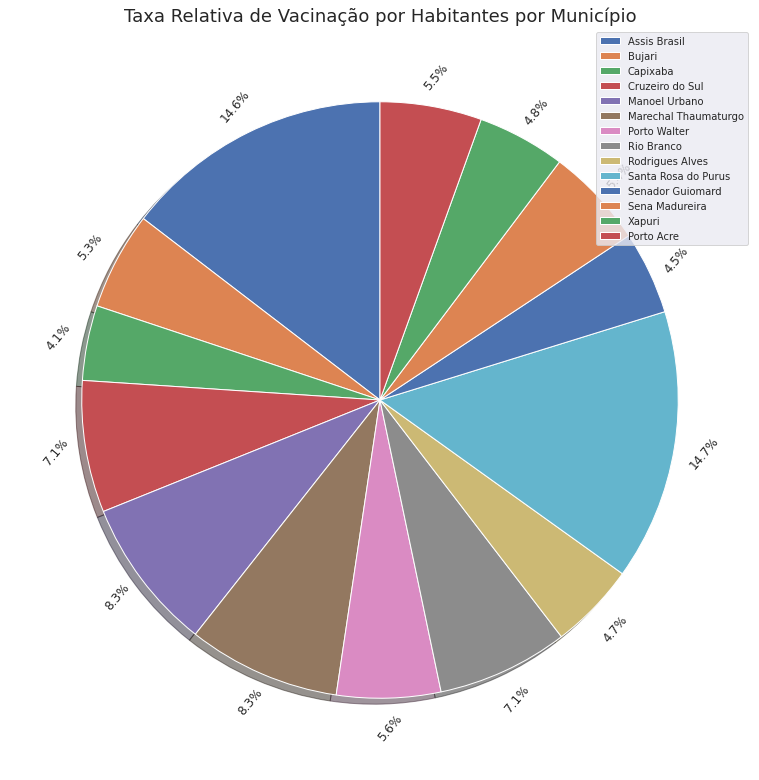

In [59]:
plt.figure(figsize=(11,11))
plt.pie(list(vac_prop.values()),
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        pctdistance=1.1,
        labeldistance=1.2,
        textprops={'rotation': 50})
plt.title('Taxa Relativa de Vacinação por Habitantes por Município',fontsize=18)
plt.legend(vac_prop.keys(),loc='upper right',fontsize=10)
plt.tight_layout()
plt.show()

### Vacinas Aplicadas - Desagregado por Faixa Etária

In [60]:
faixas_etarias = [(0,20),(21,60),(61,70),(71,80),(81,90),(91,100)]

In [61]:
faixas = {}
for i,nome in enumerate(faixas_etarias):
  contagem_i = []
  for idade in df['paciente_idade']:
    for faixa in range(faixas_etarias[i][0],faixas_etarias[i][1]):
      if idade == faixa:
        contagem_i.append(idade)
  faixas[nome] = contagem_i

In [62]:
idades_total = [(lambda x: len(faixas[x]))(x) for x in faixas]

In [63]:
idades = {str(faixa):total for faixa,total in zip(faixas_etarias,idades_total)}

In [64]:
idades_serie = pd.Series(list(idades.values()),index=idades.keys())

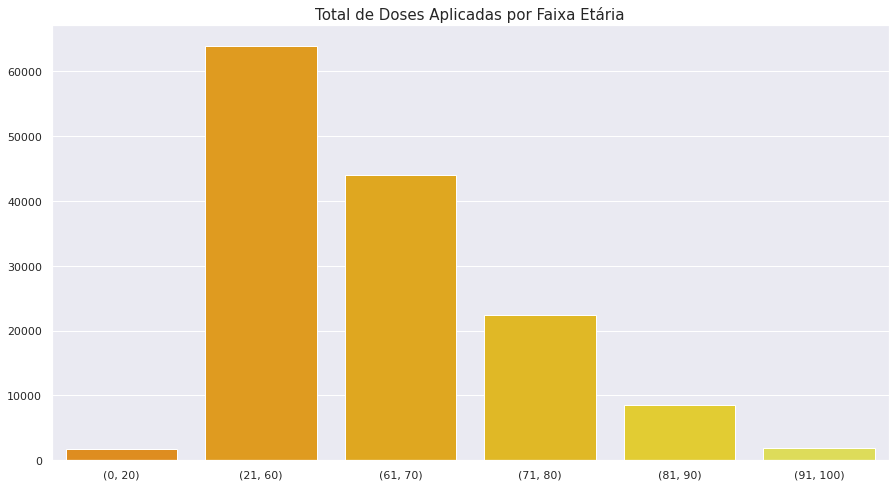

In [65]:
sns.barplot(x = list(idades.keys()), y = list(idades.values()),palette='Wistia_r')
plt.title('Total de Doses Aplicadas por Faixa Etária',fontsize=15)
plt.show()

### Vacinas Aplicadas - Desagregado por Sexo do Paciente

In [67]:
df['paciente_enumsexobiologico'].unique()

array(['F', 'M'], dtype=object)

In [68]:
vacs_masc = df[df['paciente_enumsexobiologico'] == 'M'].groupby(df.vacina_dataaplicacao)['paciente_id'].agg('count')
vacs_fem = df[df['paciente_enumsexobiologico'] == 'F'].groupby(df.vacina_dataaplicacao)['paciente_id'].agg('count')

In [69]:
vacs_sexo = pd.concat([vacs_masc,vacs_fem],axis=1)
vacs_sexo.columns = ['Masculino','Feminino']

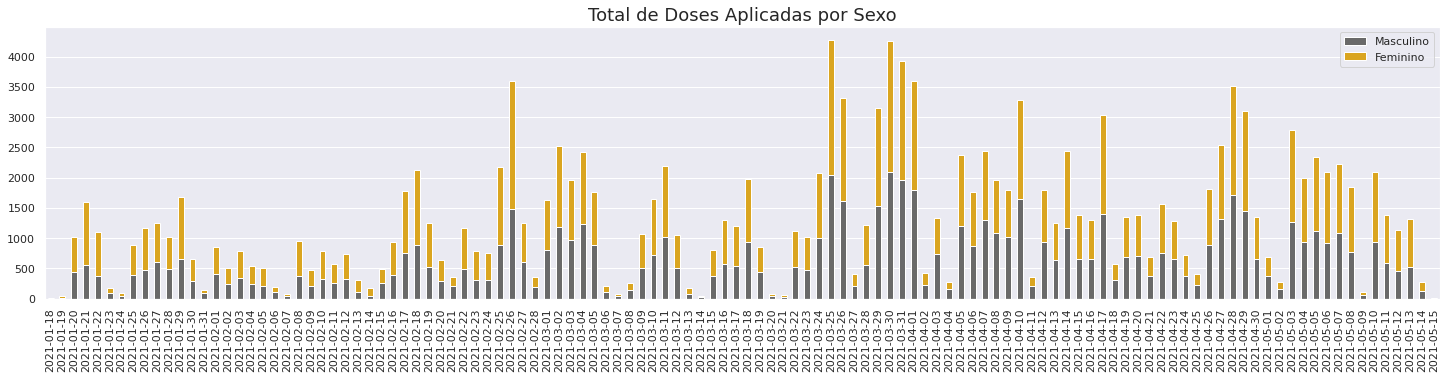

In [70]:
vacs_sexo.plot.bar(stacked=True,color=['dimgray','goldenrod'],figsize = (25,5))
plt.title('Total de Doses Aplicadas por Sexo',fontsize = 18)
plt.grid(axis = 'x')

plt.show()

### Vacinas Aplicadas - Desagregado por Etnia

In [72]:
print('Classificações:')
print(df['paciente_racacor_valor'].unique())
print('')
print('Codigos:')
print(df['paciente_racacor_codigo'].unique())

Classificações:
['PARDA' 'AMARELA' 'INDIGENA' 'BRANCA' 'PRETA' 'SEM INFORMACAO']

Codigos:
[ 3  4  5  1  2 99]


In [73]:
etnias = {nome:codigo for nome,codigo in zip(df['paciente_racacor_valor'].unique(),df['paciente_racacor_codigo'].unique())}

In [74]:
etnias_vacs = {}
for i,nome in enumerate(etnias.keys()):
  contagem_i = []
  for etnia in df['paciente_racacor_valor']:
    if etnia == nome:
        contagem_i.append(etnia)
  etnias_vacs[nome] = contagem_i

In [75]:
etnias_total = {nome:len(valor) for nome,valor in etnias_vacs.items()}

In [76]:
etnias_serie = pd.Series(list(etnias_total.values()),index=etnias_total.keys())

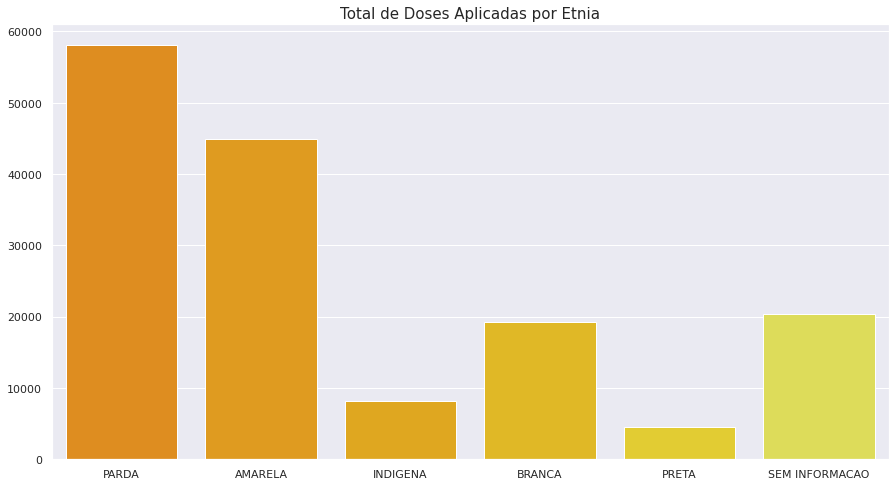

In [77]:
sns.barplot(x=list(etnias_total.keys()), y = list(etnias_total.values()), palette='Wistia_r')
plt.title('Total de Doses Aplicadas por Etnia',fontsize = 15)
plt.show()

## Exportando Dados Agregados Para o Excel:

In [ ]:
writer = pd.ExcelWriter('Vacinacao.xlsx', engine='xlsxwriter')
#
evolucao_total.to_excel(writer, sheet_name='Evolucao Diária - Total')
#
doses.to_excel(writer, sheet_name='Evolucao - Doses')
#
vacs_tipo.to_excel(writer,sheet_name='Evolucao - Fabricantes')
#
grupos_vac.to_excel(writer,sheet_name='Evolucao - Grupos')
#
categs_vac.to_excel(writer,sheet_name='Evolucao - Categorias')
#
vac_municipios.to_excel(writer,sheet_name='Evolucao - Municipios')
#
idades_serie.to_excel(writer,sheet_name='Evolucao - Faixas Etárias')
#
vacs_sexo.to_excel(writer,sheet_name='Evolucao - Sexo')
#
etnias_serie.to_excel(writer,sheet_name='Evolução - Etnias')

writer.save()